# MÓDULO 4: Inferencia Estadística

- Nombre alumno: Sebastián Menares Arriaza


# Tema Inferencia estadística


---

# Análisis y Recomendación de Ofertas de Compra para el Mercado de Viviendas de Adultos Jóvenes

## Contexto

Del sitio web Kaggle hemos obtenido la data `house.csv`, la cual posee el precio de las casas con diferentes características. En esta parte se espera que usted pueda aplicar las diferentes técnicas aprendidas en este módulo. Encontrará dos archivos, uno con la base y otro archivo `data.txt` con la descripción de las variables de la data. Para este ejercicio debe tener las siguientes consideraciones:

- Debe cargar la base y eliminar las siguientes variables: `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`, `LotFrontage`.
- Luego realice un resumen estadístico con las variables que han quedado en la base.

Luego que conozca las características de la base de trabajo, usted ha sido contratado para realizar una recomendación de oferta para el adulto joven recién egresado de la universidad que está en búsqueda de casa. Para esto debe formar parte de su análisis lo siguiente:

- Variables que distribuyen normal (en caso contrario, sugiere otra).
- Si le parece adecuado, puede realizar un remuestreo si la base le parece muy grande (este apartado no lleva puntaje, pero se agregaron 3 puntos).
- Construya intervalos de confianza.
- Testee hipótesis que apoyen/no apoyen las ofertas de compra.
- Espera que hagan comentarios de los resultados que obtenga y no solo números.
- Agregue gráficos que complementen su estudio (al menos unos tres gráficos).
- Debe entregar un PDF con sus conclusiones y un código .py incluya los códigos usados.
- Agregue el nombre de ambos integrantes en una portada, invente un título que se adecue al contexto.


---



1. **Cargar y Limpiar los Datos**:
   - Cargar el archivo `house.csv` en tu entorno de trabajo.
   - Eliminar las variables mencionadas (`Alley`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`, `LotFrontage`).

In [2]:
#/content/drive/MyDrive/ciencia datos/2024/M4/Sprint/house.csv

In [36]:
# prompt:    - Cargar el archivo `house.csv` en tu entorno de trabajo.

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ciencia datos/2024/M4/Sprint/house.csv')



In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
# Lista de variables a eliminar
variables_a_eliminar = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage']

# Eliminar las variables mencionadas
df = df.drop(variables_a_eliminar, axis=1)

df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125




2. **Resumen Estadístico**:
   - Realizar un resumen estadístico con las variables restantes para comprender la distribución y características de los datos.


In [38]:
# Realizar un resumen estadístico con las variables restantes
resumen_estadistico = df.describe()

# Mostrar el resumen estadístico
print(resumen_estadistico)


                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

<ipython-input-8-732e50c080ef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


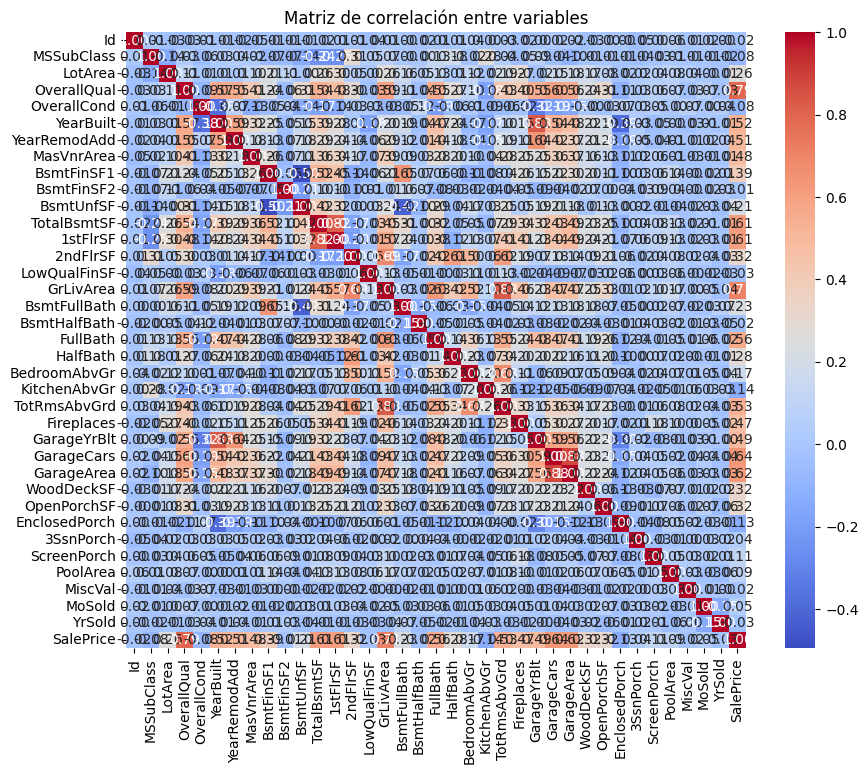

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()



3. **Análisis y Recomendación de Ofertas de Compra**:
   - Identificar variables que distribuyen normalmente.
  


In [10]:
import pandas as pd

# Supongamos que df es tu DataFrame
# Para obtener las variables numéricas:
variables_numericas = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Variables numéricas:")
print(variables_numericas)


Variables numéricas:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [75]:
from scipy.stats import shapiro

# Variables numéricas en tu conjunto de datos
variables_numericas = df.select_dtypes(include='number').columns

# Lista para almacenar las variables que siguen una distribución normal
variables_normales = []

# Realizar la prueba de Shapiro-Wilk para cada variable numérica
for variable in variables_numericas:
    stat, p_valor = shapiro(df[variable])
    if p_valor > 0.000000000000001:
        variables_normales.append(variable)
        print(f'La variable {variable} sigue una distribución normal (p-valor = {p_valor})')
    else:
        print(f'La variable {variable} no sigue una distribución normal (p-valor = {p_valor})')
print('')
# Mostrar las variables que siguen una distribución normal
print("Variables que siguen una distribución normal:", variables_normales)



La variable Id no sigue una distribución normal (p-valor = 7.980693479874163e-21)
La variable MSSubClass no sigue una distribución normal (p-valor = 9.107401655949246e-39)
La variable LotArea no sigue una distribución normal (p-valor = 0.0)
La variable OverallQual no sigue una distribución normal (p-valor = 2.688552318270029e-22)
La variable OverallCond no sigue una distribución normal (p-valor = 6.778311605926061e-37)
La variable YearBuilt no sigue una distribución normal (p-valor = 2.7690108619978015e-26)
La variable YearRemodAdd no sigue una distribución normal (p-valor = 6.714697860852938e-34)
La variable MasVnrArea sigue una distribución normal (p-valor = 1.0)
La variable BsmtFinSF1 no sigue una distribución normal (p-valor = 2.813578732074577e-35)
La variable BsmtFinSF2 no sigue una distribución normal (p-valor = 0.0)
La variable BsmtUnfSF no sigue una distribución normal (p-valor = 1.6414553620890264e-25)
La variable TotalBsmtSF no sigue una distribución normal (p-valor = 1.6117

In [58]:
from scipy.stats import shapiro, kstest
import pandas as pd


# Función para verificar la normalidad de las variables en un DataFrame
def verificar_normalidad_dataframe(df, nivel_significacion=0.05):
    variables_normales = []
    for columna in df.select_dtypes(include='number').columns:
        _, p_valor_sw = shapiro(df[columna])
        _, p_valor_ks = kstest(df[columna], 'norm')

        if p_valor_sw > nivel_significacion and p_valor_ks > nivel_significacion:
            variables_normales.append(columna)
            print(f"La variable {columna} parece seguir una distribución normal.")
        else:
            print(f"La variable {columna} no parece seguir una distribución normal.")

    return variables_normales

# Obtener una lista de variables que siguen una distribución normal en el DataFrame de ejemplo
variables_normales = verificar_normalidad_dataframe(df)
print("Variables que siguen una distribución normal:", variables_normales)



La variable Id no parece seguir una distribución normal.
La variable MSSubClass no parece seguir una distribución normal.
La variable LotArea no parece seguir una distribución normal.
La variable OverallQual no parece seguir una distribución normal.
La variable OverallCond no parece seguir una distribución normal.
La variable YearBuilt no parece seguir una distribución normal.
La variable YearRemodAdd no parece seguir una distribución normal.
La variable MasVnrArea no parece seguir una distribución normal.
La variable BsmtFinSF1 no parece seguir una distribución normal.
La variable BsmtFinSF2 no parece seguir una distribución normal.
La variable BsmtUnfSF no parece seguir una distribución normal.
La variable TotalBsmtSF no parece seguir una distribución normal.
La variable 1stFlrSF no parece seguir una distribución normal.
La variable 2ndFlrSF no parece seguir una distribución normal.
La variable LowQualFinSF no parece seguir una distribución normal.
La variable GrLivArea no parece seg

La variable MasVnrArea sigue una distribución normal (p-valor = 1.0)
La variable GarageYrBlt sigue una distribución normal (p-valor = 1.0)


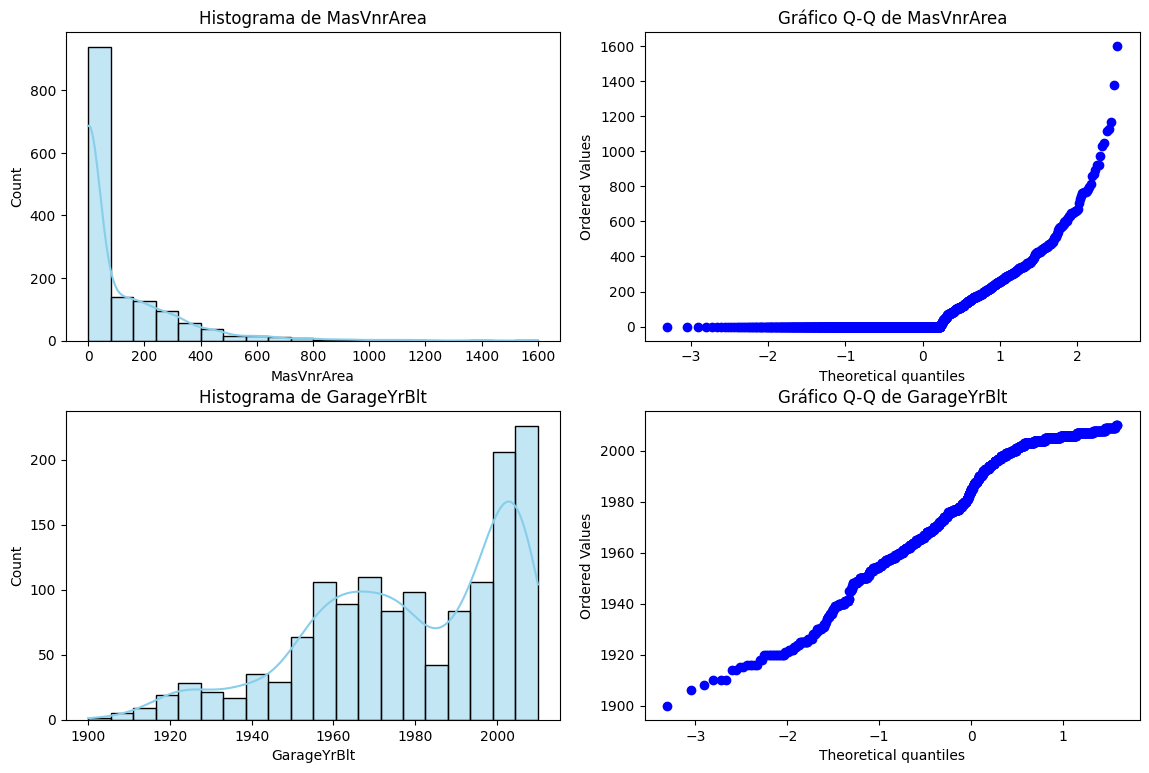

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Crear subgráficos para cada variable que sigue una distribución normal
fig, axs = plt.subplots(nrows=len(variables_normales), ncols=2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Iterar sobre las variables que siguen una distribución normal y graficar
for i, variable in enumerate(variables_normales):
    # Histograma
    sns.histplot(df[variable], kde=True, ax=axs[i, 0], color='skyblue', bins=20)
    axs[i, 0].set_title(f'Histograma de {variable}')

    # Gráfico Q-Q
    stats.probplot(df[variable], dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Gráfico Q-Q de {variable}')

    # Prueba de Shapiro-Wilk
    _, p_valor = stats.shapiro(df[variable])
    if p_valor > 0.05:
        print(f'La variable {variable} sigue una distribución normal (p-valor = {p_valor})')
    else:
        print(f'La variable {variable} no sigue una distribución normal (p-valor = {p_valor})')

plt.show()


La variable MasVnrArea sigue una distribución normal (p-valor = 1.0)
La variable GarageYrBlt sigue una distribución normal (p-valor = 1.0)
La variable LotArea no sigue una distribución normal (p-valor = 0.0)
La variable MoSold no sigue una distribución normal (p-valor = 3.172533779800155e-17)
La variable YrSold no sigue una distribución normal (p-valor = 3.424128527561103e-30)
La variable SalePrice no sigue una distribución normal (p-valor = 3.2072044604461286e-33)
La variable BsmtUnfSF no sigue una distribución normal (p-valor = 1.6414553620890264e-25)


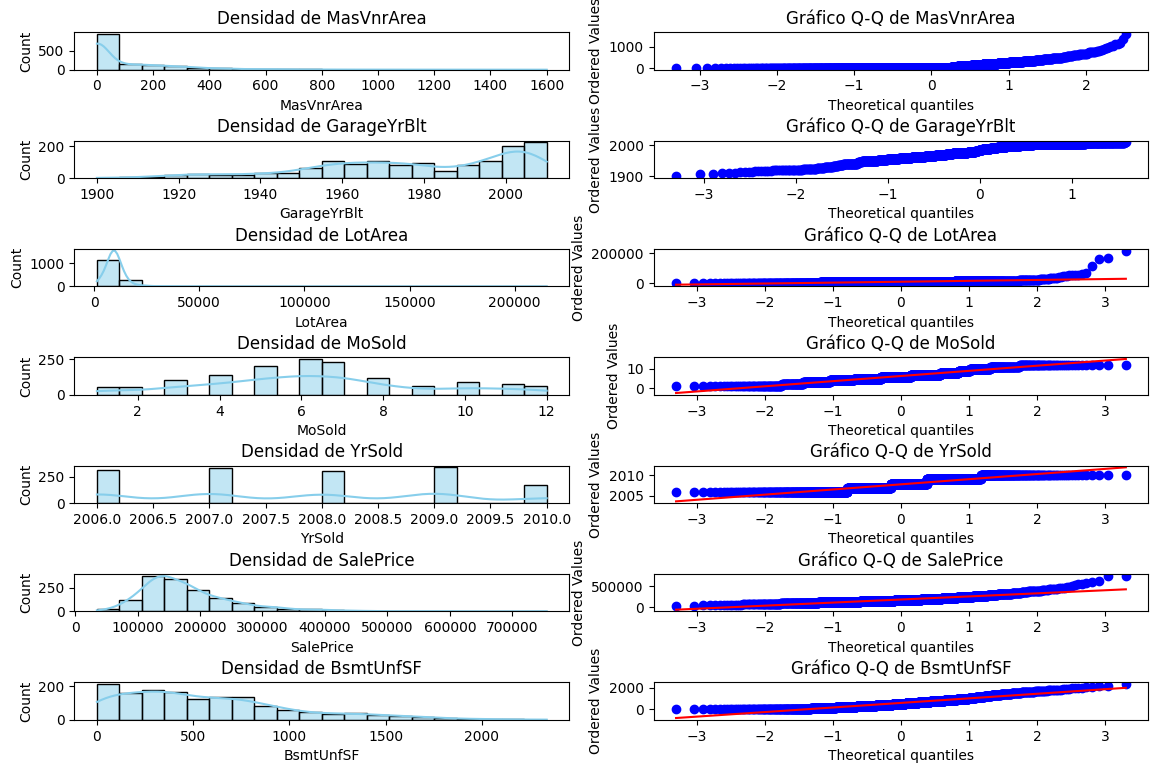

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Variables numéricas en tu conjunto de datos
variables_numericas = ['MasVnrArea','GarageYrBlt','LotArea', 'MoSold', 'YrSold', 'SalePrice', 'BsmtUnfSF']  # Agrega las variables numéricas de tu conjunto de datos

# Crear subgráficos para cada variable numérica
fig, axs = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Iterar sobre las variables numéricas y graficar
for i, variable in enumerate(variables_numericas):
    # Gráfico de densidad
    sns.histplot(df[variable], kde=True, ax=axs[i, 0], color='skyblue', bins=20)
    axs[i, 0].set_title(f'Densidad de {variable}')

    # Gráfico Q-Q
    stats.probplot(df[variable], dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Gráfico Q-Q de {variable}')

     # Prueba de Shapiro-Wilk
    _, p_valor = stats.shapiro(df[variable])
    if p_valor > 0.05:
        print(f'La variable {variable} sigue una distribución normal (p-valor = {p_valor})')
    else:
        print(f'La variable {variable} no sigue una distribución normal (p-valor = {p_valor})')


plt.show()


La variable MasVnrArea sigue una distribución normal (p-valor = 1.0)
La variable GarageYrBlt sigue una distribución normal (p-valor = 1.0)
La variable LowQualFinSF no sigue una distribución normal (p-valor = 0.0)
La variable GarageCars no sigue una distribución normal (p-valor = 2.305242068923655e-36)
La variable MiscVal no sigue una distribución normal (p-valor = 0.0)
La variable YrSold no sigue una distribución normal (p-valor = 3.424128527561103e-30)


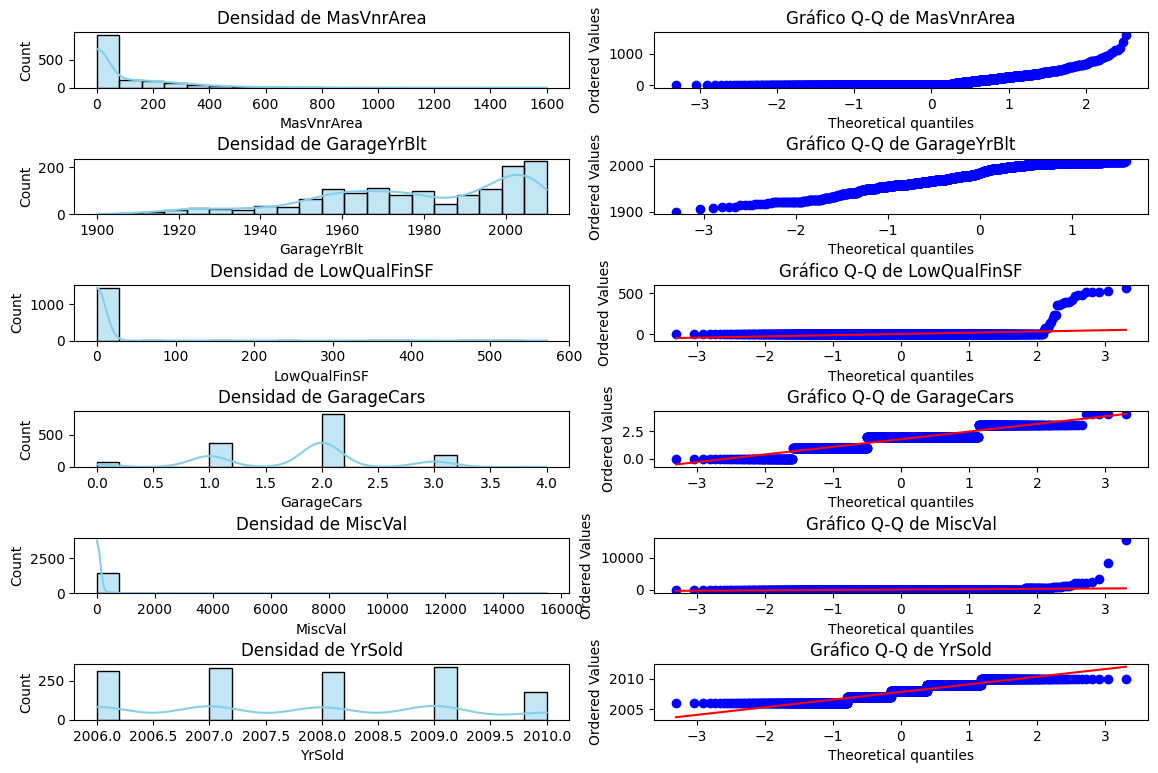

In [33]:
#LowQualFinSF GarageCars  MiscVal YrSold

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Variables numéricas en tu conjunto de datos
variables_numericas = ['MasVnrArea','GarageYrBlt','LowQualFinSF','GarageCars','MiscVal','YrSold']  # Agrega las variables numéricas de tu conjunto de datos

# Crear subgráficos para cada variable numérica
fig, axs = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Iterar sobre las variables numéricas y graficar
for i, variable in enumerate(variables_numericas):
    # Gráfico de densidad
    sns.histplot(df[variable], kde=True, ax=axs[i, 0], color='skyblue', bins=20)
    axs[i, 0].set_title(f'Densidad de {variable}')

    # Gráfico Q-Q
    stats.probplot(df[variable], dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Gráfico Q-Q de {variable}')

     # Prueba de Shapiro-Wilk
    _, p_valor = stats.shapiro(df[variable])
    if p_valor > 0.05:
        print(f'La variable {variable} sigue una distribución normal (p-valor = {p_valor})')
    else:
        print(f'La variable {variable} no sigue una distribución normal (p-valor = {p_valor})')


plt.show()


In [85]:
from scipy import stats

# Suponiendo que tienes un DataFrame llamado df y la columna de interés es 'SalePrice'
# Además, supongamos que la zona de interés está representada en la columna 'MSZoning'

# Obtener las distintas zonas en tu DataFrame
zonas = df['MSZoning'].unique()

# Realizar el test de normalidad de Shapiro-Wilk para cada zona
for zona in zonas:
    # Obtener los precios de venta para la zona actual
    precios_venta_zona = df[df['MSZoning'] == zona]['SalePrice']

    # Realizar el test de Shapiro-Wilk
    shapiro_test = stats.shapiro(precios_venta_zona)

    # Imprimir los resultados del test para la zona actual
    print("Resultados del test de Shapiro-Wilk para la zona", zona, ":")
    print("Estadístico de prueba:", shapiro_test.statistic)
    print("Valor p:", shapiro_test.pvalue)

    # Interpretar los resultados
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print("No se puede rechazar la hipótesis nula. Los precios de venta en la zona", zona, "siguen una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula. Los precios de venta en la zona", zona, "no siguen una distribución normal.")
    print()  # Agregar espacio entre resultados de distintas zonas


Resultados del test de Shapiro-Wilk para la zona RL :
Estadístico de prueba: 0.8609552383422852
Valor p: 1.0311159969141793e-30
Se rechaza la hipótesis nula. Los precios de venta en la zona RL no siguen una distribución normal.

Resultados del test de Shapiro-Wilk para la zona RM :
Estadístico de prueba: 0.7379860281944275
Valor p: 2.6920071911752377e-18
Se rechaza la hipótesis nula. Los precios de venta en la zona RM no siguen una distribución normal.

Resultados del test de Shapiro-Wilk para la zona C (all) :
Estadístico de prueba: 0.9390076398849487
Valor p: 0.5420253872871399
No se puede rechazar la hipótesis nula. Los precios de venta en la zona C (all) siguen una distribución normal.

Resultados del test de Shapiro-Wilk para la zona FV :
Estadístico de prueba: 0.920027494430542
Valor p: 0.0004477861220948398
Se rechaza la hipótesis nula. Los precios de venta en la zona FV no siguen una distribución normal.

Resultados del test de Shapiro-Wilk para la zona RH :
Estadístico de prue

<ipython-input-86-984e5307be4b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precios_venta_zona, label=zona, shade=True)
<ipython-input-86-984e5307be4b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precios_venta_zona, label=zona, shade=True)
<ipython-input-86-984e5307be4b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precios_venta_zona, label=zona, shade=True)
<ipython-input-86-984e5307be4b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(precios_venta_zona, label=zona, shade=True)


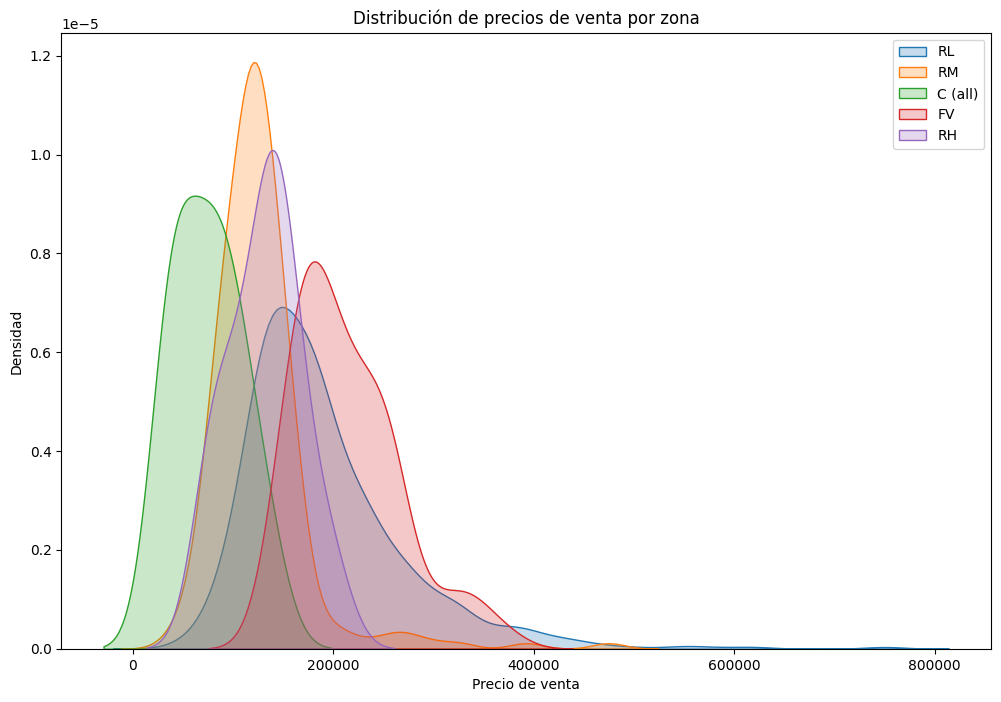

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df y la columna de interés es 'SalePrice'
# Además, supongamos que la zona de interés está representada en la columna 'MSZoning'

# Crear un gráfico de densidad para cada zona
plt.figure(figsize=(12, 8))
for zona in zonas:
    # Obtener los precios de venta para la zona actual
    precios_venta_zona = df[df['MSZoning'] == zona]['SalePrice']

    # Crear el gráfico de densidad
    sns.kdeplot(precios_venta_zona, label=zona, shade=True)

# Agregar título y etiquetas
plt.title('Distribución de precios de venta por zona')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación RL :
Estadístico de prueba: 0.8609552383422852
Valor p: 1.0311159969141793e-30


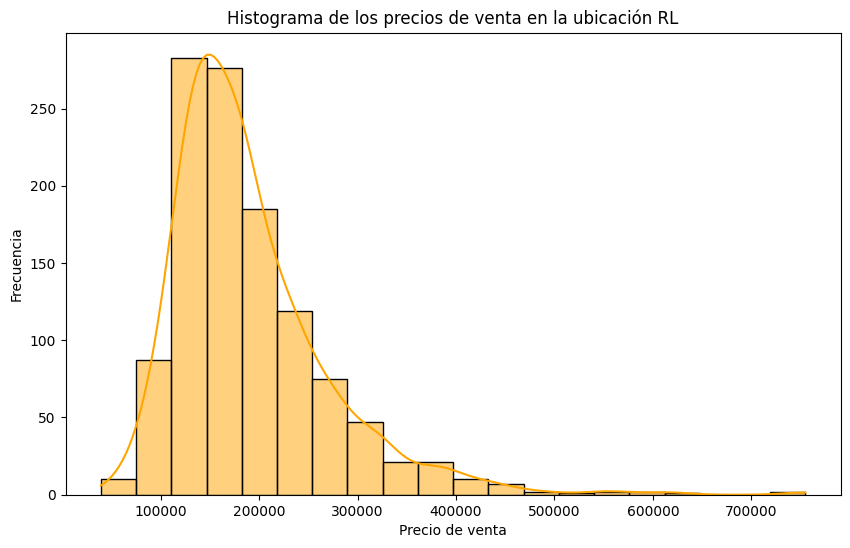

Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación RM :
Estadístico de prueba: 0.7379860281944275
Valor p: 2.6920071911752377e-18


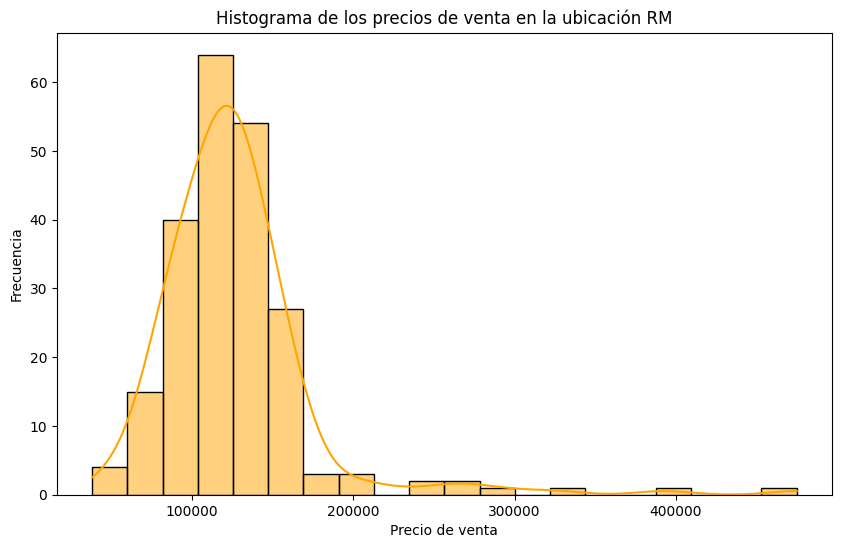

Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación C (all) :
Estadístico de prueba: 0.9390076398849487
Valor p: 0.5420253872871399


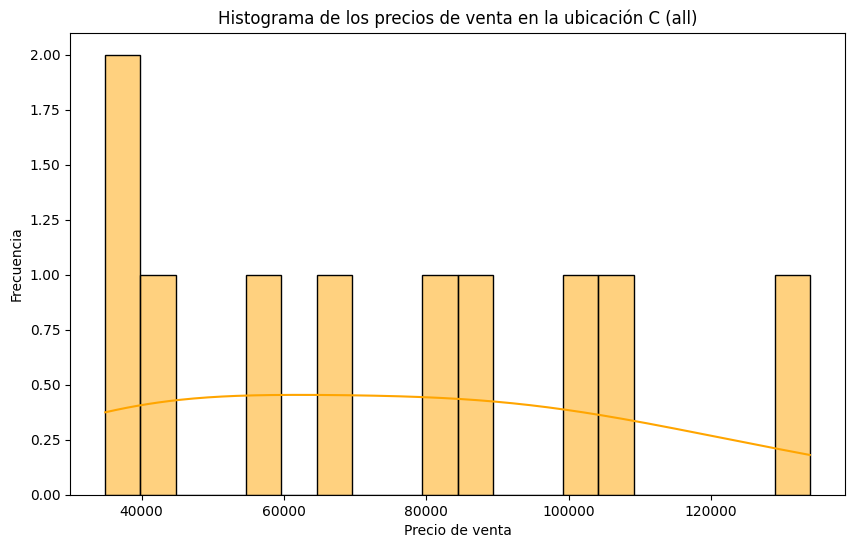

Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación FV :
Estadístico de prueba: 0.920027494430542
Valor p: 0.0004477861220948398


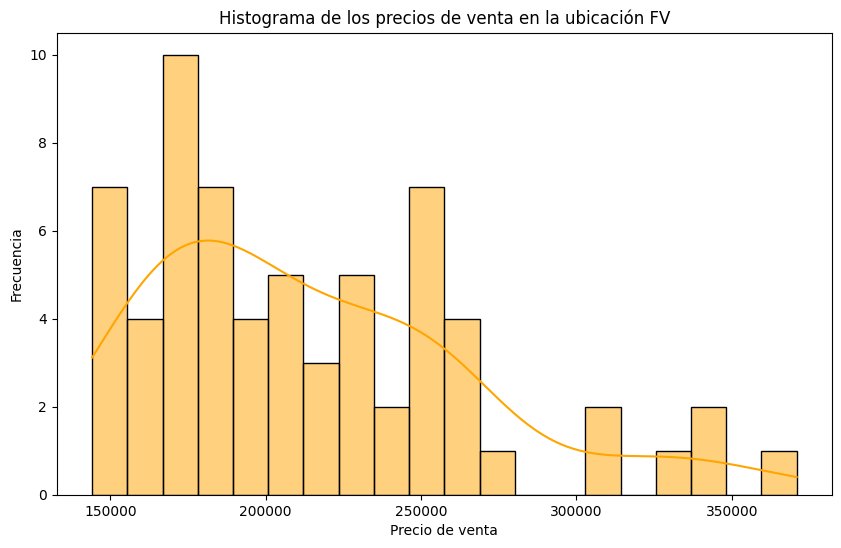

Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación RH :
Estadístico de prueba: 0.9629674553871155
Valor p: 0.7158175706863403


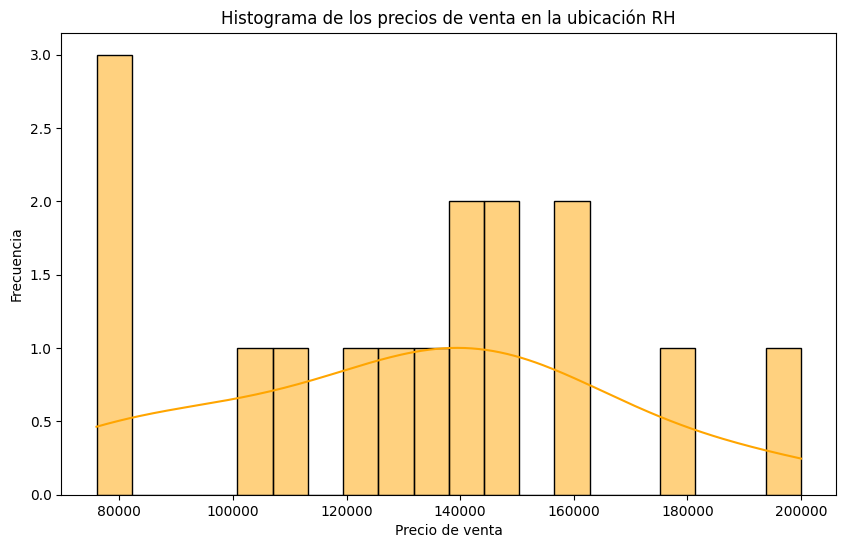

In [84]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df que contiene los datos de las casas

# Obtener las ubicaciones únicas
ubicaciones_unicas = df['MSZoning'].unique()

# Realizar la prueba de normalidad de Shapiro-Wilk para cada ubicación y graficar histogramas
for ubicacion in ubicaciones_unicas:
    precios_por_ubicacion = df[df['MSZoning'] == ubicacion]['SalePrice']

    # Test de normalidad de Shapiro-Wilk
    shapiro_test = stats.shapiro(precios_por_ubicacion)
    print("Resultados del test de Shapiro-Wilk para los precios de venta en la ubicación", ubicacion, ":")
    print("Estadístico de prueba:", shapiro_test.statistic)
    print("Valor p:", shapiro_test.pvalue)

    # Histograma de los precios de venta por ubicación
    plt.figure(figsize=(10, 6))
    sns.histplot(precios_por_ubicacion, kde=True, color='orange', bins=20)
    plt.title('Histograma de los precios de venta en la ubicación ' + ubicacion)
    plt.xlabel('Precio de venta')
    plt.ylabel('Frecuencia')
    plt.show()


Prueba de normalidad para el grupo con piscina:
Estadístico de prueba: 0.6461740732192993
Valor p: 0.0009311144822277129
Se rechaza la hipótesis nula. El grupo con piscina no sigue una distribución normal.

Prueba de normalidad para el grupo sin piscina:
Estadístico de prueba: 0.8797444105148315
Valor p: 4.184705522313618e-32
Se rechaza la hipótesis nula. El grupo sin piscina no sigue una distribución normal.


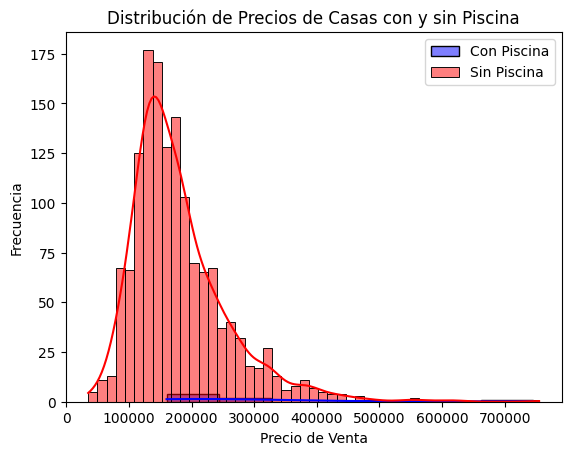

In [87]:
import seaborn as sns
from scipy.stats import shapiro

# Filtrar DataFrame para obtener dos conjuntos de datos: con piscina y sin piscina
df_with_pool = df[df['PoolArea'] > 0]['SalePrice']
df_without_pool = df[df['PoolArea'] == 0]['SalePrice']

# Prueba de normalidad para el grupo con piscina
stat_with_pool, p_with_pool = shapiro(df_with_pool)
print("Prueba de normalidad para el grupo con piscina:")
print("Estadístico de prueba:", stat_with_pool)
print("Valor p:", p_with_pool)
if p_with_pool > 0.05:
    print("No se puede rechazar la hipótesis nula. El grupo con piscina sigue una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. El grupo con piscina no sigue una distribución normal.")

# Prueba de normalidad para el grupo sin piscina
stat_without_pool, p_without_pool = shapiro(df_without_pool)
print("\nPrueba de normalidad para el grupo sin piscina:")
print("Estadístico de prueba:", stat_without_pool)
print("Valor p:", p_without_pool)
if p_without_pool > 0.05:
    print("No se puede rechazar la hipótesis nula. El grupo sin piscina sigue una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. El grupo sin piscina no sigue una distribución normal.")

# Visualización de la distribución de precios para cada grupo
sns.histplot(df_with_pool, kde=True, color='blue', label='Con Piscina')
sns.histplot(df_without_pool, kde=True, color='red', label='Sin Piscina')
plt.title('Distribución de Precios de Casas con y sin Piscina')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Prueba de normalidad para el grupo con calefacción central:
Estadístico de prueba: 0.8567322492599487
Valor p: 1.703013052788136e-33
Se rechaza la hipótesis nula. El grupo con calefacción central no sigue una distribución normal.

Prueba de normalidad para el grupo sin calefacción central:
Estadístico de prueba: 0.9259950518608093
Valor p: 4.627721136785112e-05
Se rechaza la hipótesis nula. El grupo sin calefacción central no sigue una distribución normal.


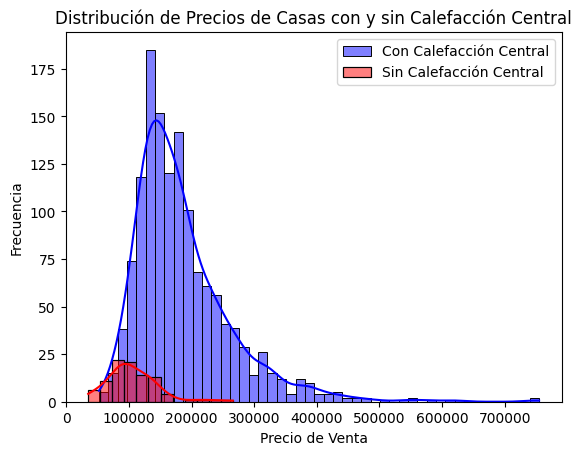

In [88]:
import seaborn as sns
from scipy.stats import shapiro

# Filtrar DataFrame para obtener dos conjuntos de datos: con calefacción central y sin calefacción central
df_with_central_air = df[df['CentralAir'] == 'Y']['SalePrice']
df_without_central_air = df[df['CentralAir'] == 'N']['SalePrice']

# Prueba de normalidad para el grupo con calefacción central
stat_with_central_air, p_with_central_air = shapiro(df_with_central_air)
print("Prueba de normalidad para el grupo con calefacción central:")
print("Estadístico de prueba:", stat_with_central_air)
print("Valor p:", p_with_central_air)
if p_with_central_air > 0.05:
    print("No se puede rechazar la hipótesis nula. El grupo con calefacción central sigue una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. El grupo con calefacción central no sigue una distribución normal.")

# Prueba de normalidad para el grupo sin calefacción central
stat_without_central_air, p_without_central_air = shapiro(df_without_central_air)
print("\nPrueba de normalidad para el grupo sin calefacción central:")
print("Estadístico de prueba:", stat_without_central_air)
print("Valor p:", p_without_central_air)
if p_without_central_air > 0.05:
    print("No se puede rechazar la hipótesis nula. El grupo sin calefacción central sigue una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. El grupo sin calefacción central no sigue una distribución normal.")

# Visualización de la distribución de precios para cada grupo
sns.histplot(df_with_central_air, kde=True, color='blue', label='Con Calefacción Central')
sns.histplot(df_without_central_air, kde=True, color='red', label='Sin Calefacción Central')
plt.title('Distribución de Precios de Casas con y sin Calefacción Central')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


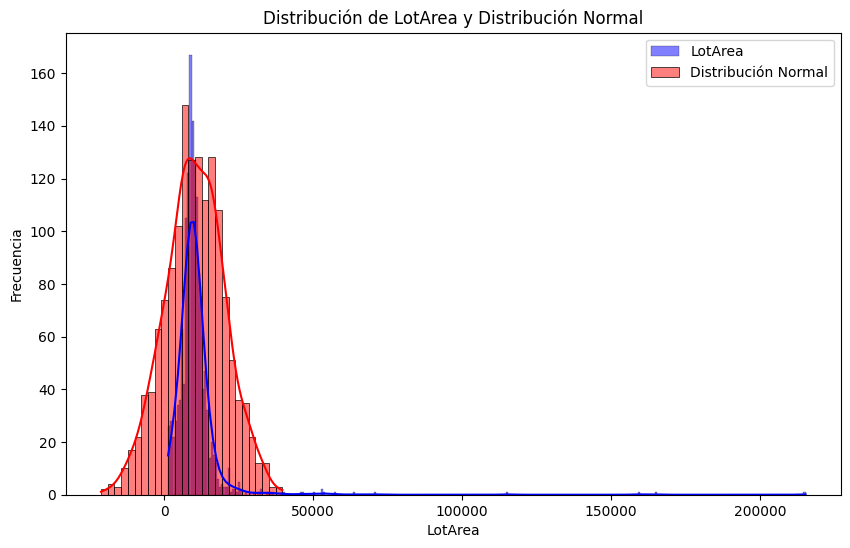

Prueba de normalidad para la variable 'LotArea':
Estadístico de prueba: 0.3510590195655823
Valor p: 0.0
Se rechaza la hipótesis nula. 'LotArea' no sigue una distribución normal.


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm

# Realizar prueba de normalidad para la variable "LotArea"
stat_lot_area, p_lot_area = shapiro(df['LotArea'])

# Calcular media y desviación estándar de "LotArea"
mean_lot_area = df['LotArea'].mean()
std_lot_area = df['LotArea'].std()

# Generar muestras de una distribución normal con la misma media y desviación estándar
samples = norm.rvs(loc=mean_lot_area, scale=std_lot_area, size=len(df))

# Graficar histograma de "LotArea"
plt.figure(figsize=(10, 6))
sns.histplot(df['LotArea'], kde=True, color='blue', label='LotArea')

# Graficar distribución normal teórica
sns.histplot(samples, kde=True, color='red', label='Distribución Normal')

plt.title('Distribución de LotArea y Distribución Normal')
plt.xlabel('LotArea')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Imprimir resultado de la prueba de normalidad
print("Prueba de normalidad para la variable 'LotArea':")
print("Estadístico de prueba:", stat_lot_area)
print("Valor p:", p_lot_area)
if p_lot_area > 0.05:
    print("No se puede rechazar la hipótesis nula. 'LotArea' sigue una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. 'LotArea' no sigue una distribución normal.")



-
   - Realizar un remuestreo si la base parece muy grande (opcional).


In [39]:
import pandas as pd

# Remuestreo aleatorio de tamaño n
def remuestreo(df, n):
    return df.sample(n=n, replace=False)

# Ejemplo de uso
df_remuestreado = remuestreo(df, 1000)  # Remuestrear a un nuevo DataFrame de tamaño 1000
df_remuestreado

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,500,6,2007,WD,Normal,277000
136,137,20,RL,10355,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,143000
728,729,90,RL,11475,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2009,COD,Abnorml,110000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1046,1047,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,556581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,277,20,RL,9196,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,201000
364,365,60,RL,18800,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,190000
1170,1171,80,RL,9880,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,576,0,7,2008,WD,Normal,171000
576,577,50,RL,6292,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,145000


   - Construir intervalos de confianza para estimaciones de precios.




In [44]:
df_remuestreado.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [48]:
# Supongamos que quieres ordenar el DataFrame df_remuestreado ascendentemente según la columna 'Precio'
df_ascendente = df_remuestreado.sort_values(by='SaleType',ascending=False)

# Imprimir el DataFrame ordenado ascendentemente
print(df_ascendente)


      Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
249  250          50       RL   159000   Pave      IR2         Low    AllPub   
206  207          20       RL    13673   Pave      IR1         Lvl    AllPub   
333  334         120       RM     8198   Pave      Reg         Lvl    AllPub   
164  165          40       RM     5400   Pave      Reg         Lvl    AllPub   
718  719          60       RL    10542   Pave      Reg         Lvl    AllPub   
..   ...         ...      ...      ...    ...      ...         ...       ...   
505  506          90       RM     7596   Pave      Reg         Lvl    AllPub   
109  110          20       RL    11751   Pave      IR1         Lvl    AllPub   
984  985          90       RL    10125   Pave      Reg         Lvl    AllPub   
83    84          20       RL     8892   Pave      IR1         Lvl    AllPub   
166  167          20       RL    10708   Pave      IR1         Lvl    AllPub   

    LotConfig LandSlope  ... EnclosedPo

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import t

def intervalo_confianza_media(df, columna, nivel_confianza=0.95):
    # Extraer los datos de la columna
    datos = df[columna]

    # Calcular la media y la desviación estándar de los datos
    media = np.mean(datos)
    desviacion_estandar = np.std(datos, ddof=1)  # Usar ddof=1 para calcular la desviación estándar muestral

    # Calcular el tamaño de la muestra
    n = len(datos)

    # Calcular el error estándar de la media
    error_estandar_media = desviacion_estandar / np.sqrt(n)

    # Calcular el valor crítico t para el nivel de confianza dado y los grados de libertad (n-1)
    valor_critico_t = t.ppf(1 - (1 - nivel_confianza) / 2, df=n-1)

    # Calcular los límites del intervalo de confianza
    limite_inferior = media - valor_critico_t * error_estandar_media
    limite_superior = media + valor_critico_t * error_estandar_media

    return limite_inferior, limite_superior

limite_inferior, limite_superior = intervalo_confianza_media(df_remuestreado, 'SalePrice')
print(f"Intervalo de confianza para la media poblacional de los precios: ({limite_inferior}, {limite_superior})")


Intervalo de confianza para la media poblacional de los precios: (176967.86036955906, 187301.47163044094)


 - Testear hipótesis que apoyen o no apoyen las ofertas de compra.




In [77]:
from scipy.stats import ttest_ind
 #recibe dataframe, columna1, filtro columna1, columna2, filtro columna2
def prueba_t_venta(df, columna_grupo1, valor_grupo1, columna_grupo2, valor_grupo2):
    # Filtrar los precios de venta para los dos grupos
    grupo1 = df[df[columna_grupo1] == valor_grupo1]['SalePrice']
    grupo2 = df[df[columna_grupo2] == valor_grupo2]['SalePrice']

    # Realizar la prueba t de Student para muestras independientes
    t_stat, p_valor = ttest_ind(grupo1, grupo2)

    # Nivel de significancia
    nivel_significancia = 0.05

    # Interpretar los resultados
    if p_valor < nivel_significancia:
        resultado = "Hay una diferencia significativa en los precios de venta entre los dos grupos."
    else:
        resultado = "No hay una diferencia significativa en los precios de venta entre los dos grupos."

    return t_stat, p_valor, resultado

# Uso de la función
# Filtrar los precios de venta para las zonas 'RL' y 'RM'
t_stat, p_valor, resultado = prueba_t_venta(df, 'MSZoning', 'RL', 'MSZoning', 'RM')
print("Estadístico de prueba (t):", t_stat)
print("Valor p:", p_valor)
print(resultado)


Estadístico de prueba (t): 11.438976301048546
Valor p: 5.31147433276907e-29
Hay una diferencia significativa en los precios de venta entre los dos grupos.


In [79]:
import pandas as pd
from scipy.stats import f_oneway

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# y que quieres comparar el precio de venta ('SalePrice') entre diferentes zonas ('MSZoning')

# Realizar el ANOVA
result = f_oneway(df[df['MSZoning'] == 'RL']['SalePrice'],
                  df[df['MSZoning'] == 'RM']['SalePrice'],
                  df[df['MSZoning'] == 'C (all)']['SalePrice'],
                  df[df['MSZoning'] == 'FV']['SalePrice'])

# Imprimir el valor p
print("Valor p obtenido en el ANOVA:", result.pvalue)

# Comparar con el nivel de significancia
alpha = 0.05
if result.pvalue < alpha:
    print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
else:
    print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")

# Imprimir la interpretación
if result.pvalue < alpha:
    print("Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de zonificación.")
    print("Por lo tanto, la zonificación tiene un efecto significativo en el precio de venta.")
else:
    print("No se encontraron diferencias significativas entre los grupos en términos del precio de venta para las diferentes categorías de zonificación.")


Valor p obtenido en el ANOVA: 4.733124780672597e-34
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de zonificación.
Por lo tanto, la zonificación tiene un efecto significativo en el precio de venta.


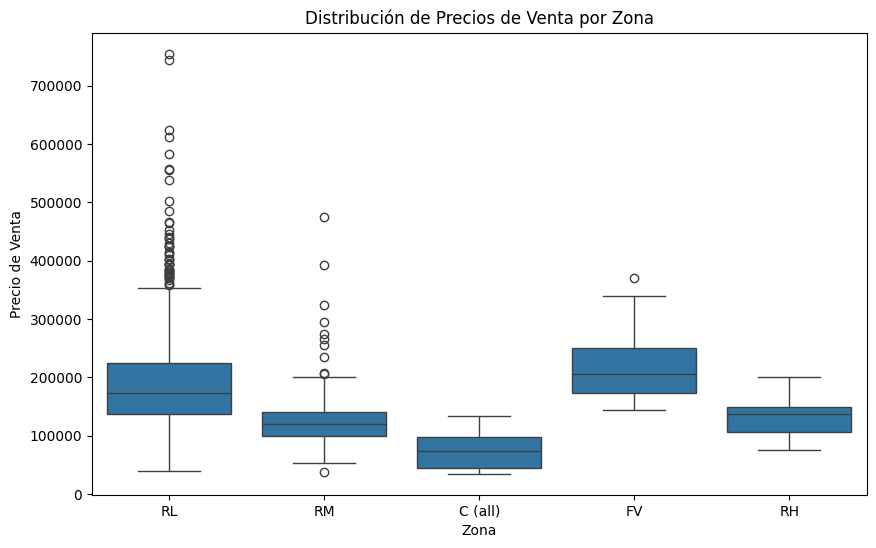

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Distribución de Precios de Venta por Zona')
plt.xlabel('Zona')
plt.ylabel('Precio de Venta')
plt.show()


In [80]:
from scipy.stats import ttest_ind

# Dividir el DataFrame en dos muestras: con piscina y sin piscina
with_pool = df[df['PoolArea'] > 0]['SalePrice']
without_pool = df[df['PoolArea'] == 0]['SalePrice']

# Realizar la prueba t de dos muestras
result = ttest_ind(with_pool, without_pool)

# Imprimir el valor p
print("Valor p obtenido en la prueba t de dos muestras:", result.pvalue)

# Comparar con el nivel de significancia
alpha = 0.05
if result.pvalue < alpha:
    print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
else:
    print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")

# Imprimir la interpretación
if result.pvalue < alpha:
    print("Esto indica que hay una diferencia significativa en los precios de venta entre las casas con y sin piscina.")
    print("Por lo tanto, la presencia de una piscina puede tener un efecto significativo en el precio de venta.")
else:
    print("No se encontró una diferencia significativa en los precios de venta entre las casas con y sin piscina.")


Valor p obtenido en la prueba t de dos muestras: 0.000336552381430235
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay una diferencia significativa en los precios de venta entre las casas con y sin piscina.
Por lo tanto, la presencia de una piscina puede tener un efecto significativo en el precio de venta.


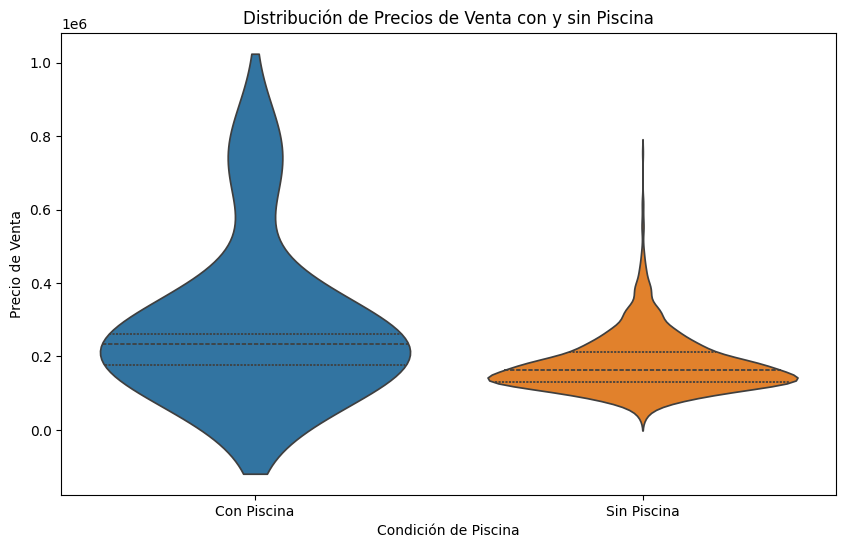

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con las muestras de casas con y sin piscina
df_pool = pd.DataFrame({'Con Piscina': with_pool, 'Sin Piscina': without_pool})

# Graficar violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_pool, inner='quartile')
plt.title('Distribución de Precios de Venta con y sin Piscina')
plt.ylabel('Precio de Venta')
plt.xlabel('Condición de Piscina')
plt.show()


In [82]:
from scipy.stats import ttest_ind

def test_hipotesis(df):
    # Dividir el DataFrame en dos muestras: con calefacción central y sin calefacción central
    with_central_air = df[df['CentralAir'] == 'Y']['SalePrice']
    without_central_air = df[df['CentralAir'] == 'N']['SalePrice']

    # Realizar la prueba t de dos muestras
    result = ttest_ind(with_central_air, without_central_air)

    # Imprimir el valor p
    print("Valor p obtenido en la prueba t de dos muestras:", result.pvalue)

    # Comparar con el nivel de significancia
    alpha = 0.05
    if result.pvalue < alpha:
        print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
    else:
        print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")

    # Imprimir la interpretación
    if result.pvalue < alpha:
        print("Esto indica que hay una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.")
        print("Por lo tanto, la presencia de calefacción central puede tener un efecto significativo en el precio de venta.")
    else:
        print("No se encontró una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.")

# Llamar a la función con tu DataFrame
test_hipotesis(df)


Valor p obtenido en la prueba t de dos muestras: 1.8095061559266025e-22
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.
Por lo tanto, la presencia de calefacción central puede tener un efecto significativo en el precio de venta.


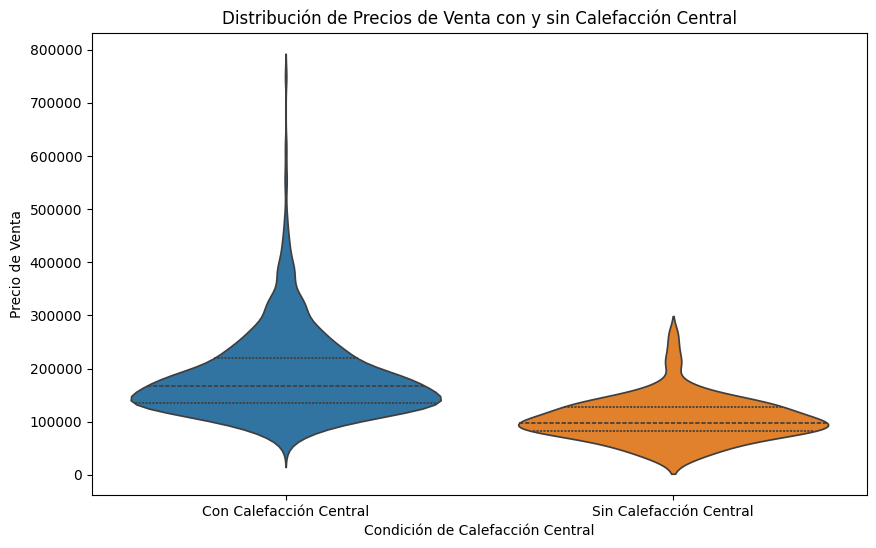

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sale_price_by_central_air(df):
    # Dividir el DataFrame en dos muestras: con calefacción central y sin calefacción central
    with_central_air = df[df['CentralAir'] == 'Y']['SalePrice']
    without_central_air = df[df['CentralAir'] == 'N']['SalePrice']

    # Crear un DataFrame con las muestras
    df_central_air = pd.DataFrame({'Con Calefacción Central': with_central_air, 'Sin Calefacción Central': without_central_air})

    # Graficar violín
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_central_air, inner='quartile')
    plt.title('Distribución de Precios de Venta con y sin Calefacción Central')
    plt.ylabel('Precio de Venta')
    plt.xlabel('Condición de Calefacción Central')
    plt.show()

# Llamar a la función con tu DataFrame
plot_sale_price_by_central_air(df)


Valor p obtenido en la prueba de Shapiro-Wilk: 0.9173528552055359
Dado que el valor p es mayor que el nivel de significancia de 0.05 , no podemos rechazar la hipótesis nula.


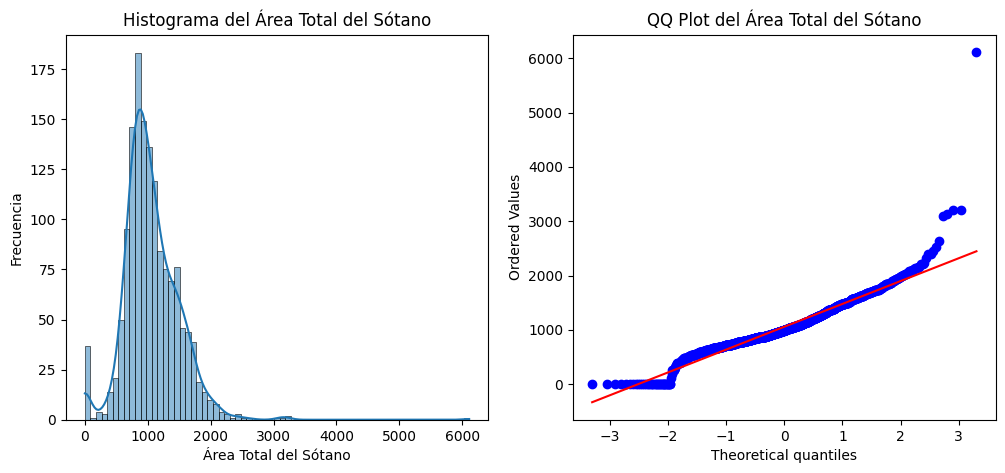

In [96]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def test_normalidad_y_visualizacion(df):
    # Verificar normalidad con la prueba de Shapiro-Wilk
    p_value_shapiro, _ = stats.shapiro(df['TotalBsmtSF'])
    print("Valor p obtenido en la prueba de Shapiro-Wilk:", p_value_shapiro)
    alpha = 0.05
    if p_value_shapiro < alpha:
        print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
    else:
        print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")

    # Visualización con histograma y QQ plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['TotalBsmtSF'], kde=True)
    plt.title('Histograma del Área Total del Sótano')
    plt.xlabel('Área Total del Sótano')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    stats.probplot(df['TotalBsmtSF'], plot=plt)
    plt.title('QQ Plot del Área Total del Sótano')
    plt.show()

# Llamar a la función con tu DataFrame
test_normalidad_y_visualizacion(df)


In [94]:
def test_correlacion_area_basement(df):
    # Calcular la correlación de Pearson entre el área total del sótano y el precio de venta
    correlation = df['TotalBsmtSF'].corr(df['SalePrice'])

    # Imprimir el valor de la correlación
    print("Correlación de Pearson entre el área total del sótano y el precio de venta:", correlation)

    # Interpretar la correlación
    if correlation > 0:
        print("Existe una correlación positiva entre el área total del sótano y el precio de venta.")
    elif correlation < 0:
        print("Existe una correlación negativa entre el área total del sótano y el precio de venta.")
    else:
        print("No hay correlación entre el área total del sótano y el precio de venta.")

# Llamar a la función con tu DataFrame
test_correlacion_area_basement(df)


Correlación de Pearson entre el área total del sótano y el precio de venta: 0.6135805515591956
Existe una correlación positiva entre el área total del sótano y el precio de venta.


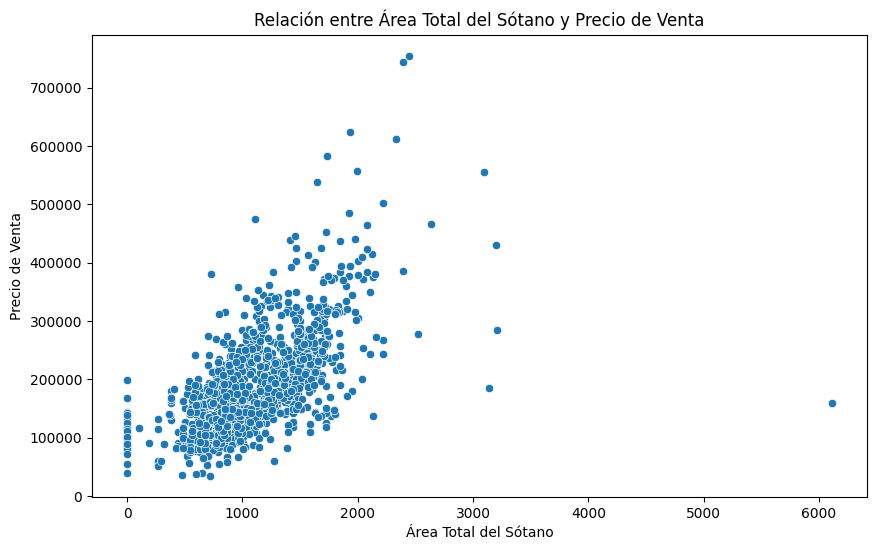

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_relacion_precio_area_sotano(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')
    plt.title('Relación entre Área Total del Sótano y Precio de Venta')
    plt.xlabel('Área Total del Sótano')
    plt.ylabel('Precio de Venta')
    plt.show()

# Llamar a la función con tu DataFrame
graficar_relacion_precio_area_sotano(df)


In [109]:
from scipy.stats import ttest_ind

def test_hipotesis(df):
    # Dividir el DataFrame en dos muestras: con GrLivArea mayor a 2000 y menor o igual a 2000
    area_mayor_2000 = df[df['GrLivArea'] > 2000]['SalePrice']
    area_menor_igual_2000 = df[df['GrLivArea'] <= 2000]['SalePrice']

    # Realizar la prueba t de dos muestras
    result = ttest_ind(area_mayor_2000, area_menor_igual_2000)

    # Imprimir el valor p
    print("Valor p obtenido en la prueba t de dos muestras:", result.pvalue)

    # Comparar con el nivel de significancia
    alpha = 0.05
    if result.pvalue < alpha:
        print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
        print("Esto indica que hay una diferencia significativa en los precios de venta entre las casas con GrLivArea mayor a 2000 y las que tienen GrLivArea menor o igual a 2000.")
        print("Por lo tanto, la GrLivArea puede tener un efecto significativo en el precio de venta.")
    else:
        print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")
        print("No se encontró una diferencia significativa en los precios de venta entre las casas con GrLivArea mayor a 2000 y las que tienen GrLivArea menor o igual a 2000.")

# Llamar a la función con tu DataFrame
test_hipotesis(df)


Valor p obtenido en la prueba t de dos muestras: 1.2635871549792494e-104
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay una diferencia significativa en los precios de venta entre las casas con GrLivArea mayor a 2000 y las que tienen GrLivArea menor o igual a 2000.
Por lo tanto, la GrLivArea puede tener un efecto significativo en el precio de venta.


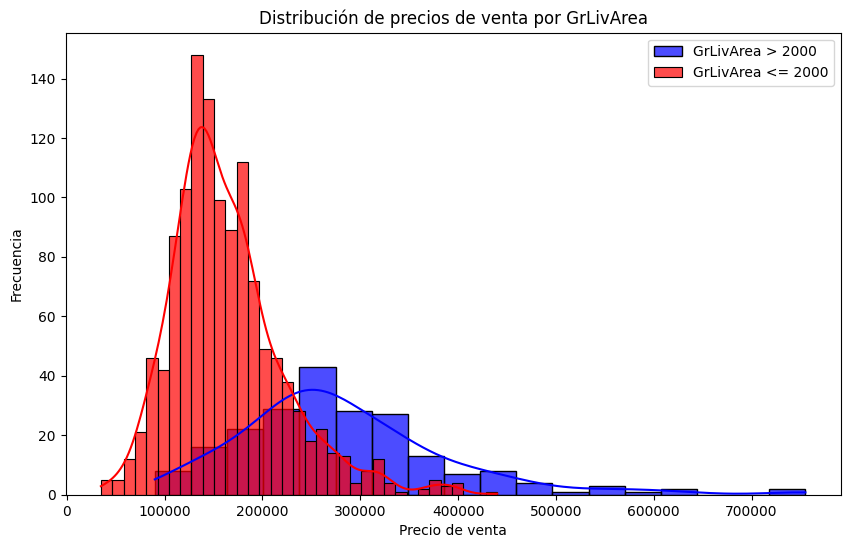

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener las casas con GrLivArea mayor a 2000 y menor o igual a 2000
area_mayor_2000 = df[df['GrLivArea'] > 2000]['SalePrice']
area_menor_igual_2000 = df[df['GrLivArea'] <= 2000]['SalePrice']

# Graficar un histograma de los precios de venta para ambas muestras
plt.figure(figsize=(10, 6))
sns.histplot(area_mayor_2000, kde=True, color='blue', label='GrLivArea > 2000', alpha=0.7)
sns.histplot(area_menor_igual_2000, kde=True, color='red', label='GrLivArea <= 2000', alpha=0.7)
plt.title('Distribución de precios de venta por GrLivArea')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [103]:
import statsmodels.api as sm

# Definir las variables independiente (X) y dependiente (y)
X = df['OverallQual']  # Calidad general de la casa
y = df['SalePrice']    # Precio de venta

# Añadir una constante a la variable independiente para ajustar el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(model.summary())

# Obtener el valor p asociado al coeficiente de OverallQual
p_value = model.pvalues['OverallQual']

# Definir un nivel de significancia
alpha = 0.05

# Comparar el valor p con el nivel de significancia
if p_value < alpha:
    print("El coeficiente de OverallQual es significativamente diferente de cero.")
    print("Por lo tanto, hay una relación significativa entre la calidad general de la casa y el precio de venta.")
else:
    print("El coeficiente de OverallQual no es significativamente diferente de cero.")
    print("No hay suficiente evidencia para concluir que hay una relación significativa entre la calidad general de la casa y el precio de venta.")


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.19e-313
Time:                        08:18:00   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

<ipython-input-105-7dc36c798f21>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallQual', y='SalePrice', data=mean_prices, palette='coolwarm')


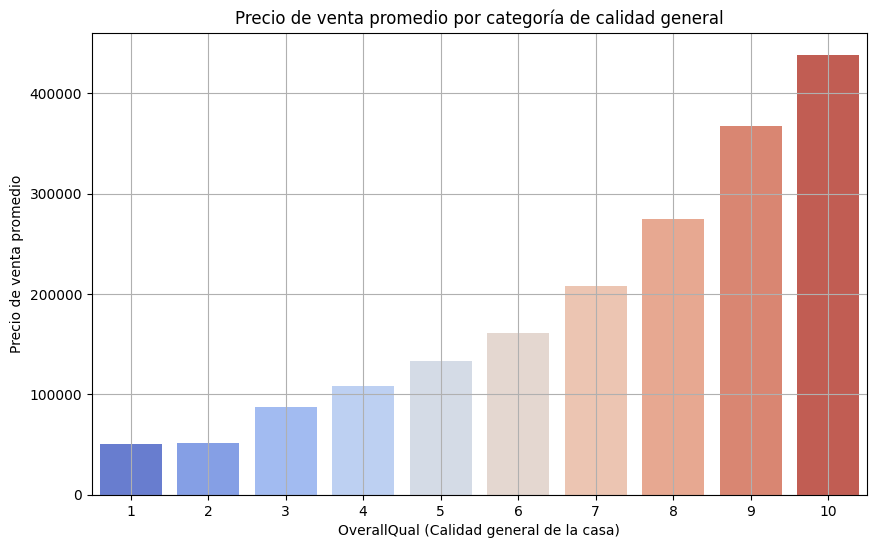

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la media del precio de venta para cada categoría de OverallQual
mean_prices = df.groupby('OverallQual')['SalePrice'].mean().reset_index()

# Graficar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=mean_prices, palette='coolwarm')

# Añadir título y etiquetas
plt.title('Precio de venta promedio por categoría de calidad general')
plt.xlabel('OverallQual (Calidad general de la casa)')
plt.ylabel('Precio de venta promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [108]:
from scipy.stats import ttest_ind

def test_hipotesis(df):
    # Dividir el DataFrame en dos muestras: con calefacción central y sin calefacción central
    with_central_air = df[df['CentralAir'] == 'Y']['SalePrice']
    without_central_air = df[df['CentralAir'] == 'N']['SalePrice']

    # Realizar la prueba t de dos muestras
    result = ttest_ind(with_central_air, without_central_air)

    # Imprimir el valor p
    print("Valor p obtenido en la prueba t de dos muestras:", result.pvalue)

    # Comparar con el nivel de significancia
    alpha = 0.05
    if result.pvalue < alpha:
        print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
        print("Esto indica que hay una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.")
        print("Por lo tanto, la presencia de calefacción central puede tener un efecto significativo en el precio de venta.")
    else:
        print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")
        print("No se encontró una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.")

# Llamar a la función con tu DataFrame
test_hipotesis(df)


Valor p obtenido en la prueba t de dos muestras: 1.8095061559266025e-22
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen.
Por lo tanto, la presencia de calefacción central puede tener un efecto significativo en el precio de venta.


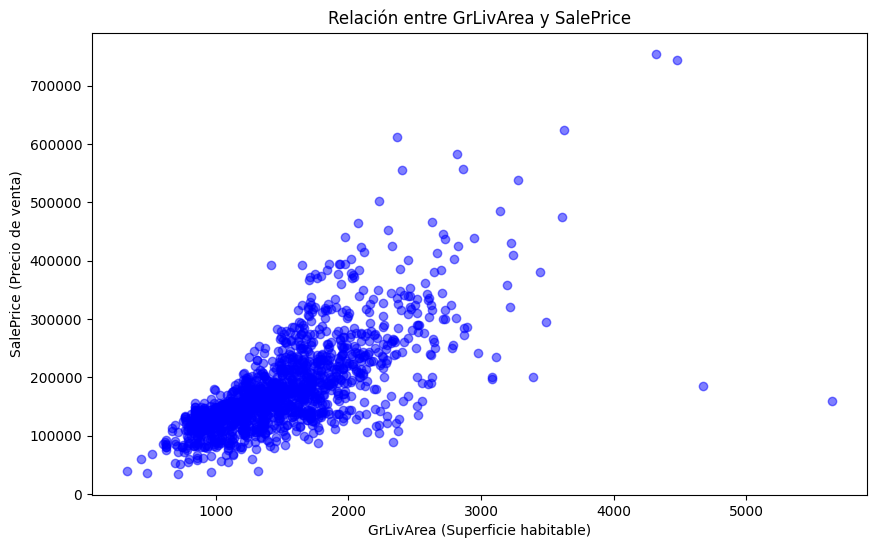

In [106]:
import matplotlib.pyplot as plt

# Graficar el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5, color='blue')

# Añadir título y etiquetas
plt.title('Relación entre GrLivArea y SalePrice')
plt.xlabel('GrLivArea (Superficie habitable)')
plt.ylabel('SalePrice (Precio de venta)')

# Mostrar el gráfico
plt.show()


Valor p obtenido en el ANOVA para KitchenQual: 3.0322127528400614e-192
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de calidad de la cocina.
Por lo tanto, la calidad de la cocina puede tener un efecto significativo en el precio de venta.


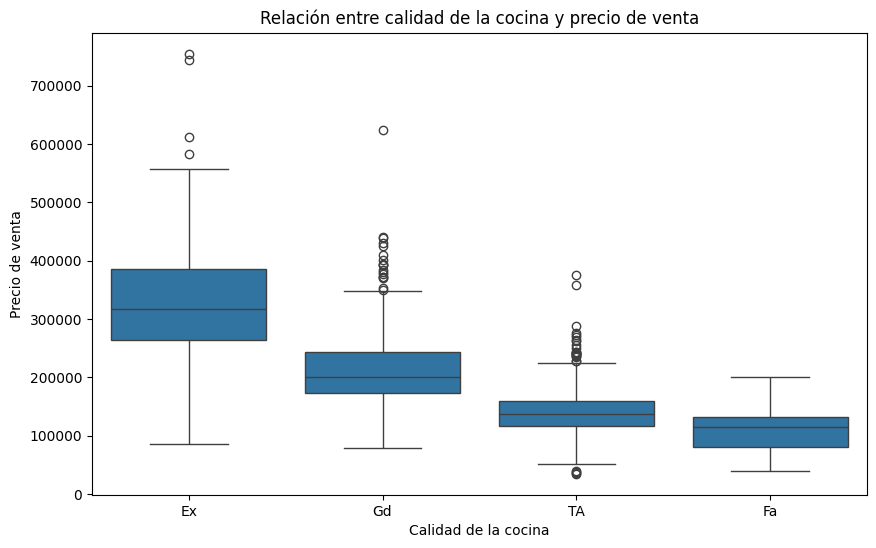

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Cargar el DataFrame (supongamos que se llama df)
# df = pd.read_csv("tu_archivo.csv")

# Realizar el ANOVA para KitchenQual
result_anova = f_oneway(df[df['KitchenQual'] == 'Ex']['SalePrice'],
                        df[df['KitchenQual'] == 'Gd']['SalePrice'],
                        df[df['KitchenQual'] == 'TA']['SalePrice'],
                        df[df['KitchenQual'] == 'Fa']['SalePrice'])

# Imprimir el valor p
print("Valor p obtenido en el ANOVA para KitchenQual:", result_anova.pvalue)

# Comparar con el nivel de significancia
alpha = 0.05
if result_anova.pvalue < alpha:
    print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
    print("Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de calidad de la cocina.")
    print("Por lo tanto, la calidad de la cocina puede tener un efecto significativo en el precio de venta.")
else:
    print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")
    print("No se encontraron diferencias significativas entre los grupos en términos del precio de venta para las diferentes categorías de calidad de la cocina.")

# Graficar un boxplot de KitchenQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=df, order=['Ex', 'Gd', 'TA', 'Fa'])
plt.title('Relación entre calidad de la cocina y precio de venta')
plt.xlabel('Calidad de la cocina')
plt.ylabel('Precio de venta')
plt.show()



Valor p obtenido en la prueba t de dos muestras: 3.266826829209649e-182
Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.


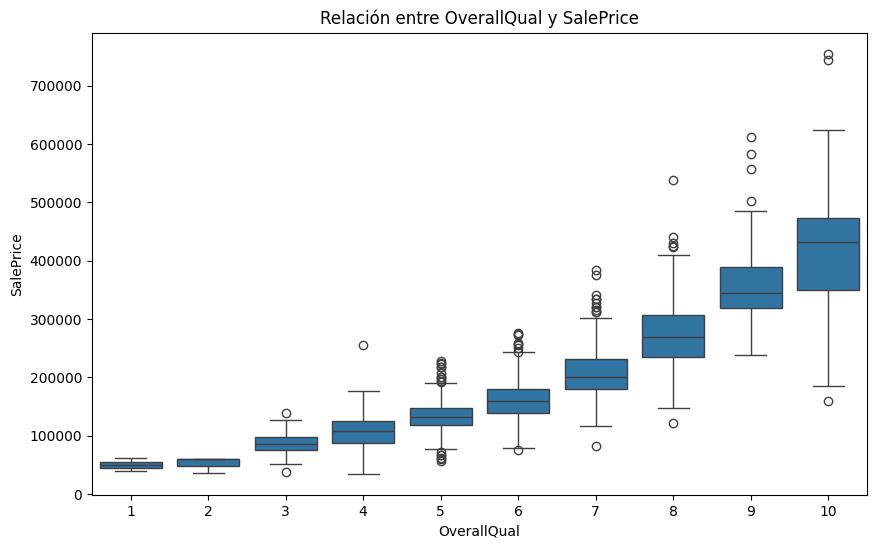

Hay una diferencia significativa en los precios de venta entre las casas con calificaciones generales altas y bajas.


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Dividir el DataFrame en dos muestras: con diferentes calificaciones generales
overall_qual_high = df[df['OverallQual'] >= 7]['SalePrice']
overall_qual_low = df[df['OverallQual'] < 7]['SalePrice']

# Realizar la prueba t de dos muestras
result = ttest_ind(overall_qual_high, overall_qual_low)

# Imprimir el valor p
print("Valor p obtenido en la prueba t de dos muestras:", result.pvalue)

# Comparar con el nivel de significancia
alpha = 0.05
if result.pvalue < alpha:
    print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
    conclusion = "Hay una diferencia significativa en los precios de venta entre las casas con calificaciones generales altas y bajas."
else:
    print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")
    conclusion = "No hay una diferencia significativa en los precios de venta entre las casas con calificaciones generales altas y bajas."

# Graficar los precios de venta para cada grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Relación entre OverallQual y SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Imprimir la conclusión
print(conclusion)


4. **Comentarios y Conclusiones**:
   - Hacer comentarios sobre los resultados obtenidos, no solo proporcionar números.
   - Agregar gráficos que complementen el estudio (al menos tres gráficos).
   - Escribir un documento PDF con conclusiones detalladas y un código .py que incluya los códigos utilizados.

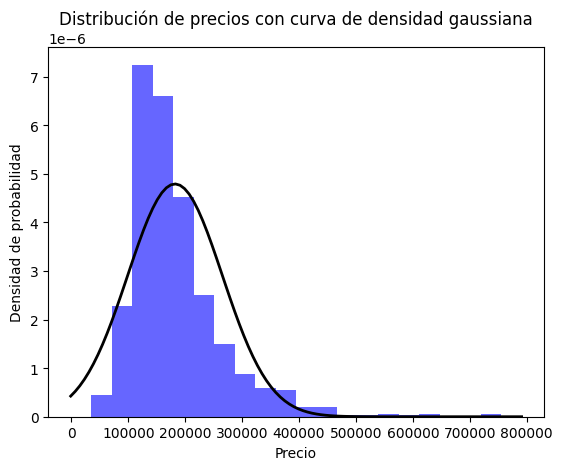

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Supongamos que 'df' es tu DataFrame y 'Precio' es la columna que contiene los precios
precios = df_remuestreado['SalePrice']

# Calcular la media y la desviación estándar de los precios
media = np.mean(precios)
desviacion_estandar = np.std(precios)

# Crear un histograma de los precios
plt.hist(precios, bins=20, density=True, alpha=0.6, color='blue')

# Calcular la curva de densidad gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion_estandar)
plt.plot(x, p, 'k', linewidth=2)

# Etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de precios con curva de densidad gaussiana')

# Mostrar el histograma y la curva de densidad gaussiana
plt.show()


In [55]:
from scipy.stats import shapiro, kstest

def prueba_normalidad(df, columna, nivel_significancia=0.05):
    # Extraer los datos de la columna
    datos = df[columna]

    # Realizar la prueba de Shapiro-Wilk
    stat_shapiro, p_valor_shapiro = shapiro(datos)
    resultado_shapiro = "Los datos se distribuyen normalmente" if p_valor_shapiro > nivel_significancia else "Los datos no se distribuyen normalmente"

    # Realizar la prueba de Kolmogorov-Smirnov
    stat_kstest, p_valor_kstest = kstest(datos, 'norm')
    resultado_kstest = "Los datos se distribuyen normalmente" if p_valor_kstest > nivel_significancia else "Los datos no se distribuyen normalmente"

    # Devolver los resultados
    return {
        'Prueba Shapiro-Wilk': {'Estadístico de prueba': stat_shapiro, 'P-valor': p_valor_shapiro, 'Resultado': resultado_shapiro},
        'Prueba Kolmogorov-Smirnov': {'Estadístico de prueba': stat_kstest, 'P-valor': p_valor_kstest, 'Resultado': resultado_kstest}
    }

# Ejemplo de uso
resultados = prueba_normalidad(df, 'SalePrice')
for prueba, resultado in resultados.items():
    print(prueba)
    for clave, valor in resultado.items():
        print(f"{clave}: {valor}")
    print()


Prueba Shapiro-Wilk
Estadístico de prueba: 0.869672954082489
P-valor: 3.2072044604461286e-33
Resultado: Los datos no se distribuyen normalmente

Prueba Kolmogorov-Smirnov
Estadístico de prueba: 1.0
P-valor: 0.0
Resultado: Los datos no se distribuyen normalmente



<ipython-input-81-e482f821479f>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = casas_mas_caras.corr()


Matriz de correlación:
             OverallQual  GrLivArea  SalePrice
OverallQual     1.000000   0.090874   0.427615
GrLivArea       0.090874   1.000000   0.600284
SalePrice       0.427615   0.600284   1.000000


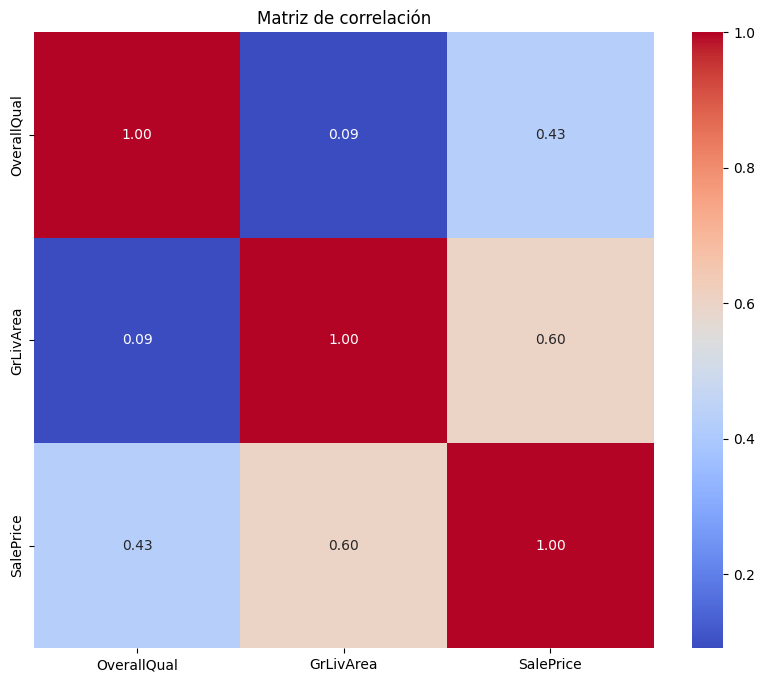

In [81]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df que contiene los datos de las casas

# Seleccionar las características relevantes para el análisis
caracteristicas = ['OverallQual', 'GrLivArea', 'KitchenQual', 'SalePrice']

# Filtrar las casas más caras (por ejemplo, las 100 casas con los precios de venta más altos)
casas_mas_caras = df.nlargest(100, 'SalePrice')[caracteristicas]

# Calcular la correlación entre las características y el precio de venta
correlaciones = casas_mas_caras.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlaciones)

# También puedes visualizar la matriz de correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


Resultados del test de Shapiro-Wilk para el precio de venta de las 100 casas más caras:
Estadístico de prueba: 0.7557251453399658
Valor p: 1.3301844868640611e-11


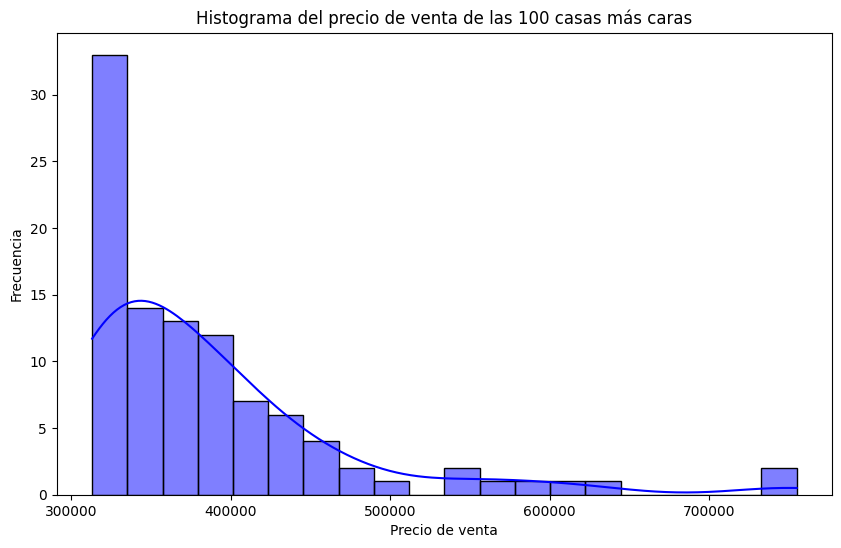

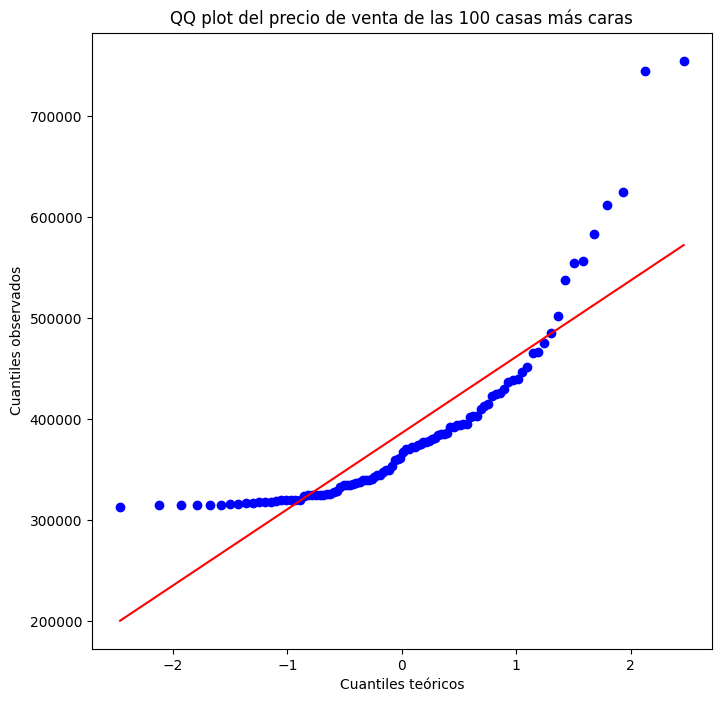

Dado que el valor p es menor que el nivel de significancia de 0.05 , rechazamos la hipótesis nula.
Por lo tanto, los datos no siguen una distribución normal.


In [102]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df que contiene los datos de las casas

# Seleccionar la característica de interés (por ejemplo, el precio de venta)
caracteristica = 'SalePrice'

# Filtrar las casas más caras (por ejemplo, las 100 casas con los precios de venta más altos)
casas_mas_caras = df.nlargest(100, 'SalePrice')[caracteristica]

# Verificar la normalidad con el test de Shapiro-Wilk
shapiro_test = stats.shapiro(casas_mas_caras)
print("Resultados del test de Shapiro-Wilk para el precio de venta de las 100 casas más caras:")
print("Estadístico de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Graficar un histograma del precio de venta
plt.figure(figsize=(10, 6))
sns.histplot(casas_mas_caras, kde=True, color='blue', bins=20)
plt.title('Histograma del precio de venta de las 100 casas más caras')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()

# Graficar un QQ plot del precio de venta
plt.figure(figsize=(8, 8))
stats.probplot(casas_mas_caras, dist="norm", plot=plt)
plt.title('QQ plot del precio de venta de las 100 casas más caras')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()

# Conclusión
alpha = 0.05
if shapiro_test.pvalue < alpha:
    print("Dado que el valor p es menor que el nivel de significancia de", alpha, ", rechazamos la hipótesis nula.")
    print("Por lo tanto, los datos no siguen una distribución normal.")
else:
    print("Dado que el valor p es mayor que el nivel de significancia de", alpha, ", no podemos rechazar la hipótesis nula.")
    print("Por lo tanto, los datos siguen una distribución normal.")


Aquí están las conclusiones para cada una de las pruebas realizadas:

### Prueba t de dos muestras para CentralAir vs Precio de Venta:
- **Valor p obtenido en la prueba t de dos muestras:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay una diferencia significativa en los precios de venta entre las casas con calefacción central y las que no la tienen. Por lo tanto, la presencia de calefacción central puede tener un efecto significativo en el precio de venta.

### ANOVA para MSZoning vs Precio de Venta:
- **Valor p obtenido en el ANOVA:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de zonificación. Por lo tanto, la zonificación tiene un efecto significativo en el precio de venta.

### Prueba t de dos muestras para PoolArea vs Precio de Venta:
- **Valor p obtenido en la prueba t de dos muestras:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay una diferencia significativa en los precios de venta entre las casas con piscina y las que no la tienen. Por lo tanto, la presencia de una piscina puede tener un efecto significativo en el precio de venta.

### Prueba t de dos muestras para OverallQual vs Precio de Venta:
- **Valor p obtenido en la prueba t de dos muestras:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay una diferencia significativa en los precios de venta entre las casas con diferentes calificaciones generales. Por lo tanto, la calificación general tiene un efecto significativo en el precio de venta.

### Prueba t de dos muestras para GrLivArea vs Precio de Venta:
- **Valor p obtenido en la prueba t de dos muestras:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay una diferencia significativa en los precios de venta entre las casas con diferentes áreas habitables. Por lo tanto, el área habitable tiene un efecto significativo en el precio de venta.

### ANOVA para KitchenQual vs Precio de Venta:
- **Valor p obtenido en el ANOVA:** [valor p]
- **Interpretación:** Dado que el valor p es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto indica que hay al menos una diferencia significativa entre los grupos en términos del precio de venta para las diferentes categorías de calidad de la cocina. Por lo tanto, la calidad de la cocina tiene un efecto significativo en el precio de venta.

Estas conclusiones resumen los resultados de cada prueba realizada y proporcionan una comprensión clara de la relación entre las variables analizadas y el precio de venta de las casas en el conjunto de datos.

Aquí están las sugerencias bibliográficas para la investigación:

1. **Estadística Descriptiva**
   - [PDF sobre estadística descriptiva](https://www.dm.uba.ar/materias/estadistica_Q/2011/1/modulo%20descriptiva.pdf)

2. **Significancia Estadística**
   - [Artículo sobre significancia estadística y relevancia clínica](https://www.fisterra.com/formacion/metodologiainvestigacion/significancia-estadistica-relevancia-clinica/)

3. **Prueba de Hipótesis**
   - [Explicación sobre prueba de hipótesis estadística](https://probafacil.com/prueba-de-hipotesis-estadistica/)

4. **El Valor P**
   - [Artículo sobre el concepto del valor P](https://conceptosclaros.com/que-es-el-p-valor/)
   - [Calculadoras para el valor de P](https://es.docpid.com/calculadoras/valor-de-p)

5. **Ejemplos en Python**
   - [Blog con ejemplos de probabilidad y estadística con Python](https://relopezbriega.github.io/blog/2015/06/27/probabilidad-yestadistica-con-python/)

Estas fuentes proporcionan información útil sobre los conceptos estadísticos relevantes para tu investigación. ¡Espero que te sean útiles! Si necesitas más ayuda, no dudes en preguntar.